# Exploratory Data Analysis of "La Redoute" reviews data from TrustedShops

## The problem :
1) Predict the rating based on the review
2) Derive/find the key issues/entities emerging from the comments
3) Predict the supplier response to the customer's review

## Required packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

import statsmodels
import statsmodels.api as sm # for statistics tests
import scipy # for the Kruskal-Wallis test

from wordcloud import WordCloud
from PIL import Image

## The data
- We choose to start with reviews on La Redoute, a leading french e-commerce company (https://www.laredoute-corporate.com/identite/)
- Data are scraped from TrustedShops website using BeautifulSoup (https://www.trustedshops.fr/evaluation/info_XA3F5BBDE34B5AD3FB64015EB823AC7C6.html)

## Load the data into a pandas dataframe

In [2]:
df = pd.read_csv("redoute.csv", index_col = 0, sep = ";")
df.head()

,rating,title,comment,createdAt,transaction,updatedAt,totalLikeCount,customerCity,SupplierReply,SupplierReplyDate
id,,,,,,,,,,
rev-cc907a30-4fb0-4e55-a4a1-307b89eb0d99,4,Facilte,"Facilte, sollicitations dosées...qualité..on p...",2023-10-05 14:18:42,2023-09-23,NaN,NaN,NaN,NaN,NaN
rev-b54467c4-4769-42e3-a74a-c72c000059f9,4,Jolie table mais plus pour 6 que pour 8,Livraison impeccable avec possibilité de prend...,2023-10-02 13:08:27,2023-09-11,NaN,NaN,NaN,NaN,NaN
rev-b480f537-524e-491e-9f85-74405332c047,4,Achat d'un canapé La Redoute intérieurs…,Achat d'un canapé La Redoute intérieurs le 6/9...,2023-09-18 16:52:21,2023-09-06,NaN,NaN,NaN,NaN,NaN
rev-f04626f5-846d-41ca-9866-46573746f75b,4,excellent site mais des changements qui compl...,je commande depuis longtemps chez la redoute; ...,2023-10-13 08:57:16,2023-10-02,NaN,NaN,NaN,NaN,NaN
rev-d3bb4eb5-ea0f-45db-afb5-313eaeaed6cb,5,"Comme d'habitude, aucun souci et rapidité d'ex...","Comme d'habitude, aucun souci et rapidité d'ex...",2023-09-21 11:09:15,2023-09-15,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34760 entries, rev-cc907a30-4fb0-4e55-a4a1-307b89eb0d99 to rev-003b0375-d471-422d-8999-839333b657fe
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             34760 non-null  int64  
 1   title              27666 non-null  object 
 2   comment            27399 non-null  object 
 3   createdAt          34760 non-null  object 
 4   transaction        30737 non-null  object 
 5   updatedAt          32 non-null     float64
 6   totalLikeCount     8 non-null      float64
 7   customerCity       3189 non-null   object 
 8   SupplierReply      6801 non-null   object 
 9   SupplierReplyDate  6801 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.9+ MB


## Missing values

In [4]:
nan_val = df.isna().sum()
nan_val[nan_val >0].index
val_manquantes = pd.DataFrame({"nb_valeurs_manquantes" : nan_val[nan_val >0].values, "pct_val_manquantes":nan_val[nan_val >0].values/len(df),}, 
                              index = nan_val[nan_val >0].index)
display(val_manquantes)

,nb_valeurs_manquantes,pct_val_manquantes
title,7094,0.204085
comment,7361,0.211766
transaction,4023,0.115736
updatedAt,34728,0.999079
totalLikeCount,34752,0.999770
customerCity,31571,0.908257
SupplierReply,27959,0.804344
SupplierReplyDate,27959,0.804344


### Remove columns with no data : "updatedAt" and "totalLikeCount", "customerCity"  have more than 90% of missing values. 

In [5]:
df = df.drop(["updatedAt", "totalLikeCount", "customerCity"], axis = 1)

### Remove lines without comments

In [6]:
df = df.dropna(subset = ["comment"])

### Remove lines where transaction date is missing

In [7]:
df = df.dropna(subset = ["transaction"])

## Add the years of comment, month of comment, day of comment, hours of comment, comment on week-end or not

In [8]:
# Creation date of the review comment
df["createdAt"] = pd.to_datetime(df["createdAt"])
df["date_of_cmt"] = df["createdAt"].dt.date
df["year_of_cmt"] = df["createdAt"].dt.year
df["month_of_cmt"] = df["createdAt"].dt.month
df["day_of_cmt"] = df["createdAt"].dt.day
df["weekday_of_cmt"] = df["createdAt"].dt.weekday
df["cmt_in_weekend"] = df["createdAt"].dt.weekday.isin([5,6]).astype(int)
df["hour_of_cmt"] = df["createdAt"].dt.hour

In [9]:
# transaction date
df["transaction"] = pd.to_datetime(df["transaction"], format='ISO8601')
df["year_of_transaction"] = df["transaction"].dt.year
df["month_of_transaction"] = df["transaction"].dt.month
df["day_of_transaction"] = df["transaction"].dt.day
df["weekday_of_transaction"] = df["transaction"].dt.weekday
df["transaction_in_weekend"] = df["transaction"].dt.weekday.isin([5,6]).astype(int)

In [10]:
df.head(2)

,rating,title,comment,createdAt,transaction,SupplierReply,SupplierReplyDate,date_of_cmt,year_of_cmt,month_of_cmt,day_of_cmt,weekday_of_cmt,cmt_in_weekend,hour_of_cmt,year_of_transaction,month_of_transaction,day_of_transaction,weekday_of_transaction,transaction_in_weekend
id,,,,,,,,,,,,,,,,,,,
rev-cc907a30-4fb0-4e55-a4a1-307b89eb0d99,4,Facilte,"Facilte, sollicitations dosées...qualité..on p...",2023-10-05 14:18:42,2023-09-23,NaN,NaN,2023-10-05,2023,10,5,3,0,14,2023,9,23,5,1
rev-b54467c4-4769-42e3-a74a-c72c000059f9,4,Jolie table mais plus pour 6 que pour 8,Livraison impeccable avec possibilité de prend...,2023-10-02 13:08:27,2023-09-11,NaN,NaN,2023-10-02,2023,10,2,0,0,13,2023,9,11,0,0


## Proportion of reviews per rating

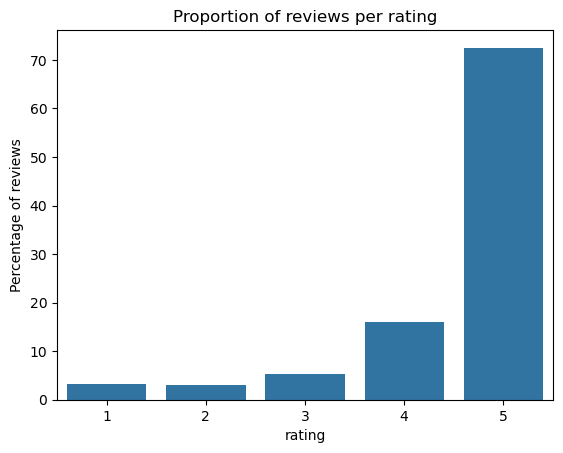

In [11]:
sns.countplot(data = df, x = "rating", stat = "percent")
plt.title("Proportion of reviews per rating")
plt.ylabel("Percentage of reviews")
plt.show()

#### The distribution of rating is strongly unbalanced: About 70% of reviews have a rating of 5. 

In [12]:
df["rating"].value_counts().sort_index(ascending = False)

rating
5    17074
4     3752
3     1231
2      719
1      769
Name: count, dtype: int64

## Rating versus time of review : year, month, weekday, weekend, hour

### Rating versus date of review

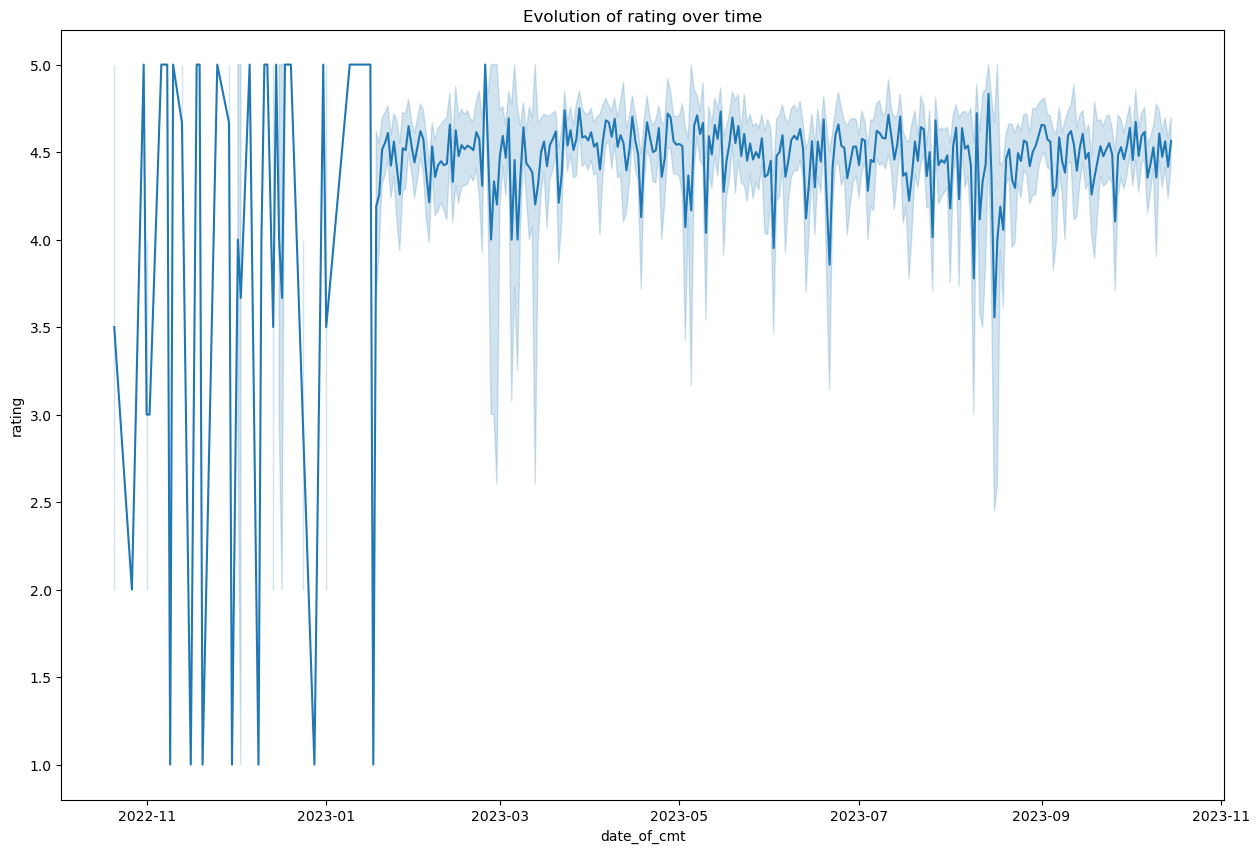

In [13]:
# Ratings versus date of review
plt.figure(figsize = (15,10))
sns.lineplot(data = df, x = "date_of_cmt", y = "rating")
plt.title("Evolution of rating over time")
plt.show()


#### Remarks from the figure
- Less data in 2022
- TBD :  check seasonality --> moyenne mobile / moving average , time series

### Rating versus date of transaction

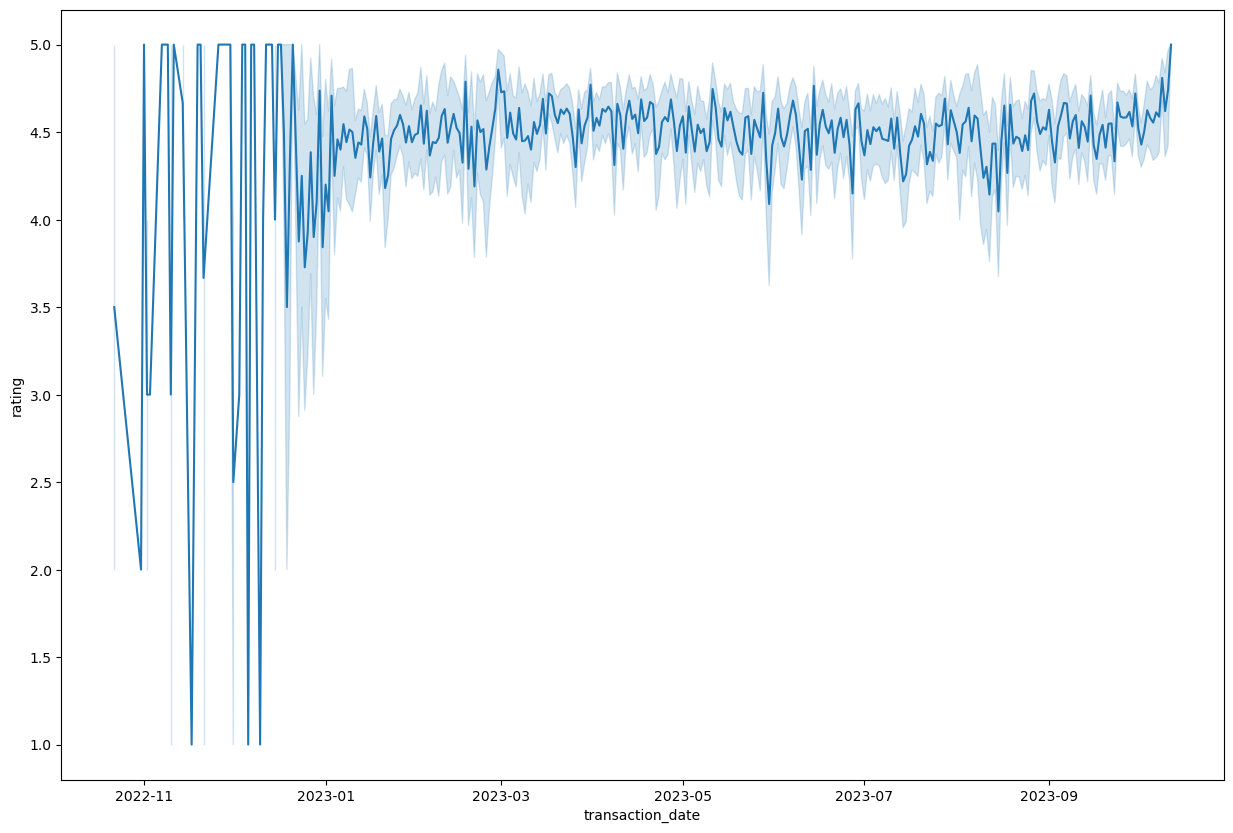

In [14]:
df["transaction_date"] = df["transaction"].dt.date
data = df.dropna(subset=["transaction"])
plt.figure(figsize = (15,10))
sns.lineplot(data = data, x = "transaction_date", y = "rating")
plt.show()

## Rating versus year, month, weekday, weekend, hour

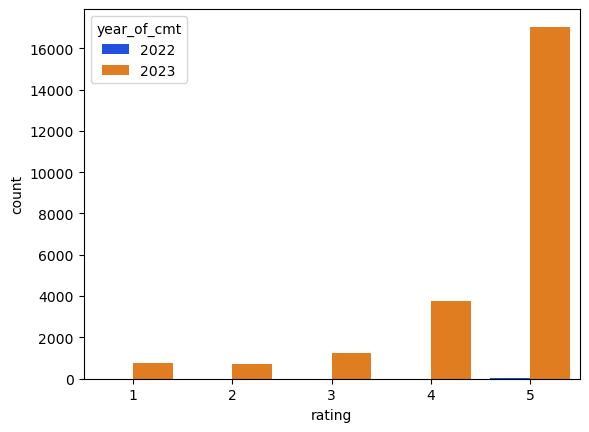

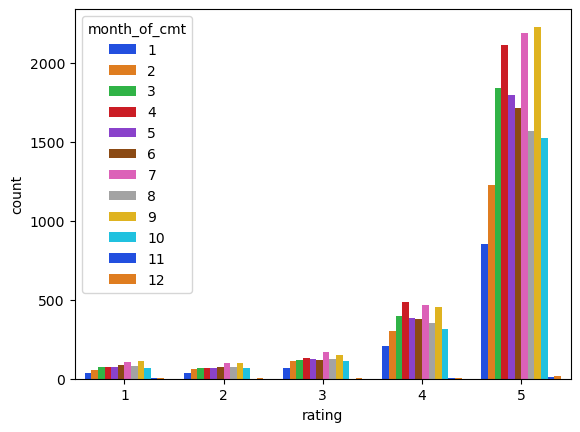

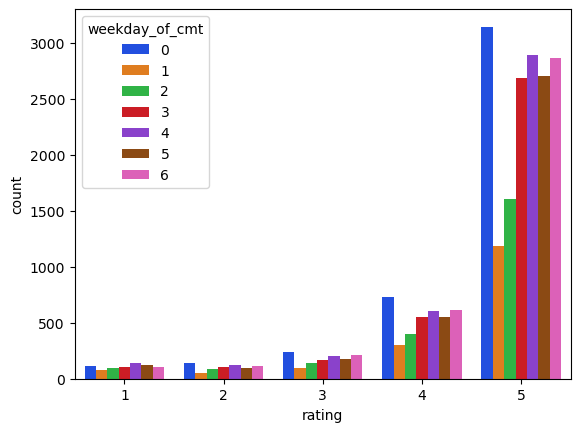

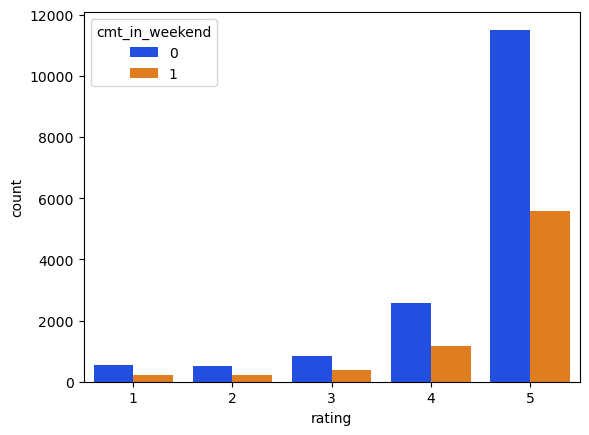

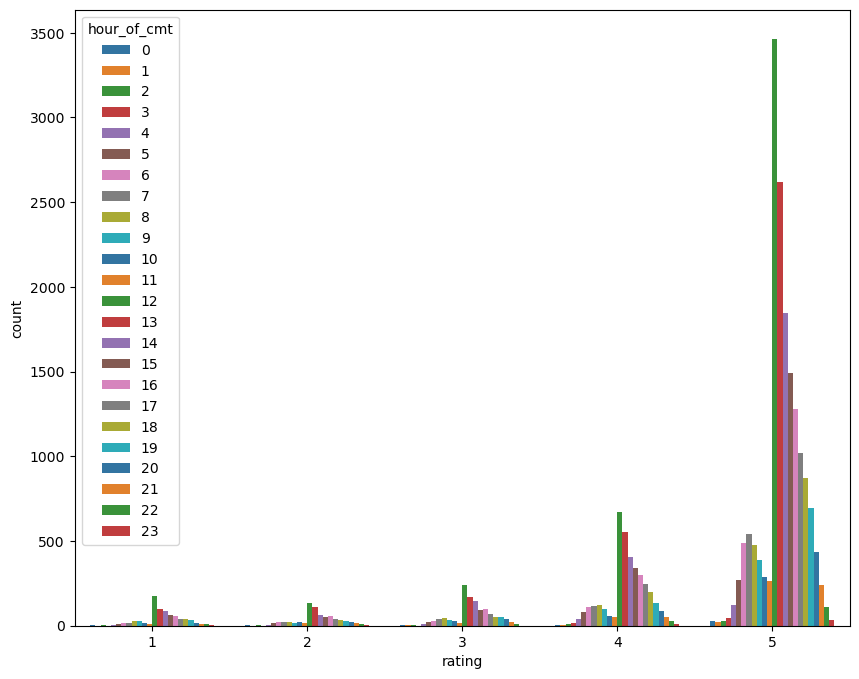

In [15]:
# Rating vs years
sns.countplot(data = df, x = "rating", hue = "year_of_cmt", palette = "bright")
plt.show()

# Rating vs month
sns.countplot(data = df, x = "rating", hue = "month_of_cmt", palette = "bright")
plt.show()

# Rating vs weekday
sns.countplot(data = df, x = "rating", hue = "weekday_of_cmt", palette = "bright")
plt.show()

# Rating vs weekend
sns.countplot(data = df, x = "rating", hue = "cmt_in_weekend", palette = "bright")
plt.show()

# Rating vs Hour of review
plt.figure(figsize=(10,8))
sns.countplot(data = df, x = "rating", hue = "hour_of_cmt", palette = "tab10")
plt.show()

#### Remarks from the figures :
1) Reviews data are mostly from year 2023
2) The distribution of rating per month is almost uniform for ratings 1,2 and 3. But more disparity for rating 4 and 5
3) Peaks of reviews in march, april, july, september and october, for almost all ratings, but very pronounced for ratings 4 and 5.
4) Most of the reviews are done between friday and monday
5) Reviews are mostly done in the afternoon, with majority of reviews between 12 and 14:
6) Reviews done in the morning are mostly done bewteen 6 and 10

## Rating versus comment's length

In [16]:
df["comment_length"] = df["comment"].apply(lambda x: len(x))
df["comment_length"].describe()

count    23545.000000
mean        87.707241
std         97.525751
min          1.000000
25%         32.000000
50%         57.000000
75%        105.000000
max       1964.000000
Name: comment_length, dtype: float64

### Zoom on comment withlength <= 2

In [17]:
cl = df["comment_length"]
df[cl <= 2][["comment", "rating"]]
#df[cl <= 2][ "rating"].value_counts()
## All of them have rating >= 4

,comment,rating
id,,
rev-6b7009a2-b483-4d76-a621-5e2fdc0a7ff2,Tt,5
rev-0deaa6a5-da4e-48b6-9fa4-c8e24e158620,✌️,4
rev-aca690dc-fe67-4c6d-9715-4703ea5d9e6c,tb,5
rev-0c092409-7511-4c64-a020-d00fe6d0701e,\n,5
rev-46e3a760-a945-4bd9-b98e-066b5cc9abb2,\n,5
rev-f07ec036-8d16-4e4e-a90f-06b2a3aba8c7,.,5
rev-f57664dd-7604-496e-b268-3f9064133ab0,,5
rev-7815be31-5a7c-4a58-bf42-0c19f3b5be9e,.,5
rev-f5cd806c-ff51-4c0f-be43-0be8363f9d03,👍,5


### Distribution of rating versus lenght of comments

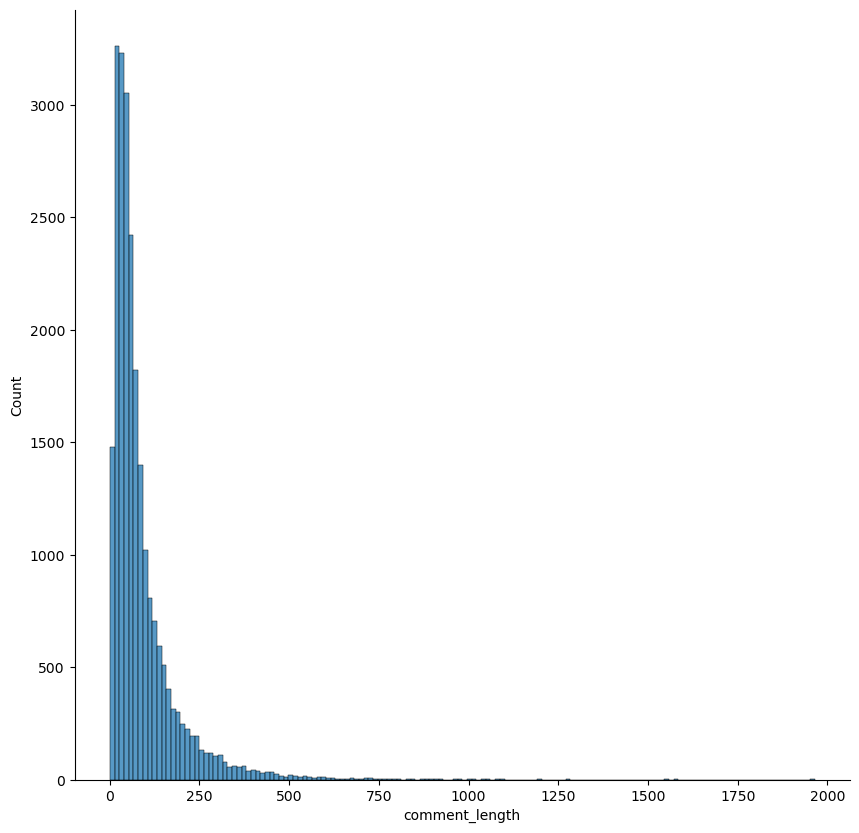

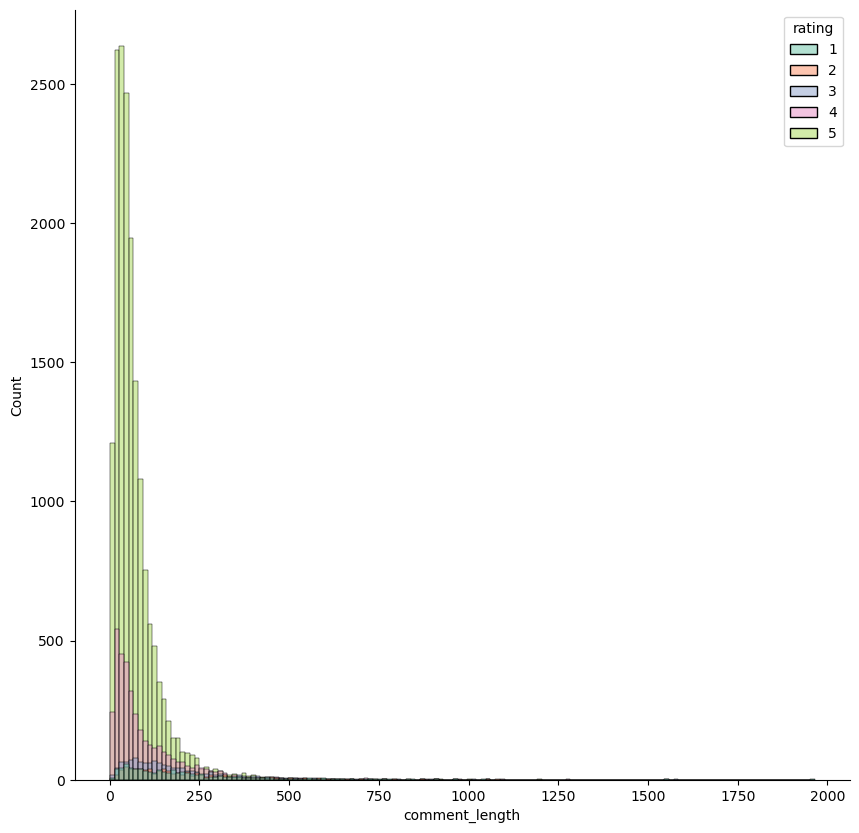

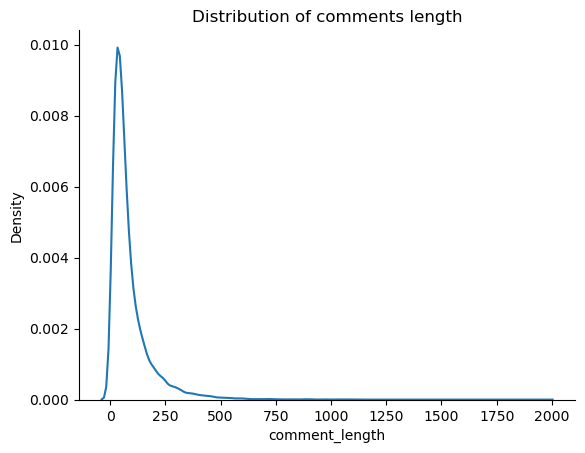

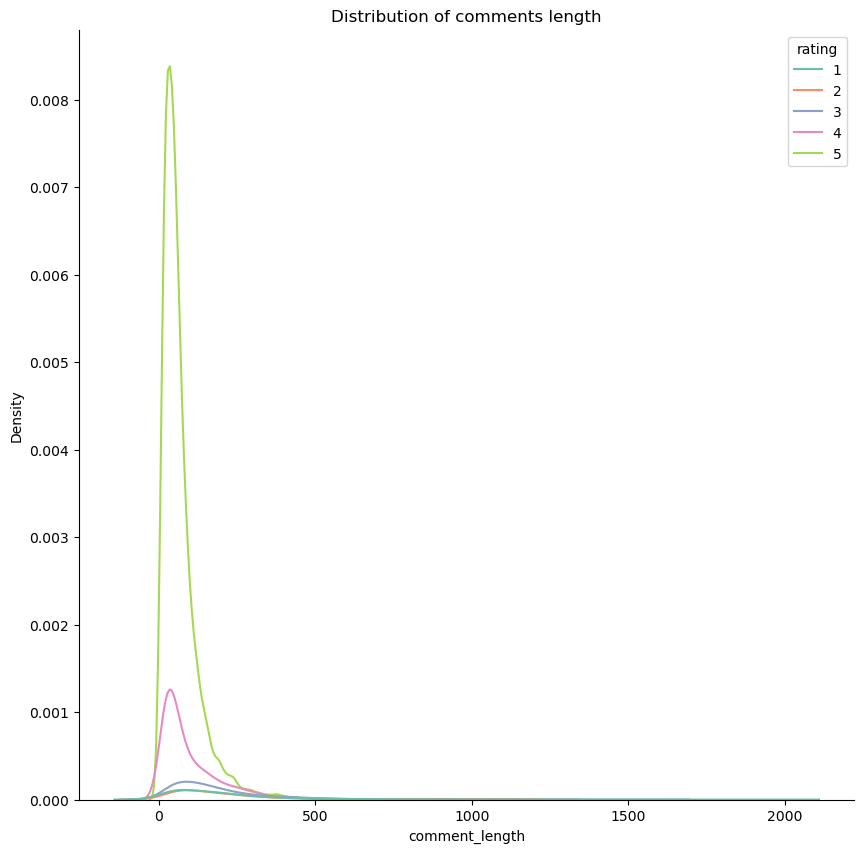

In [18]:
plt.figure(figsize=(10,10))
sns.histplot(data = df, x = "comment_length", bins = 150)
sns.despine()
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(data = df, x = "comment_length", bins = 150, hue = "rating", palette = "Set2")
sns.despine()
plt.show()

sns.kdeplot(data = df, x = "comment_length")
plt.title ("Distribution of comments length")
sns.despine()
plt.show()

plt.figure(figsize=(10,10))
sns.kdeplot(data = df, x = "comment_length", hue = "rating", palette = "Set2")
plt.title ("Distribution of comments length")
sns.despine()
plt.show()


#### Remarks on distribution figures
The distribution of reviews comments Length is positively skewed.
The data will have to be transformed before using it in a regression type model.

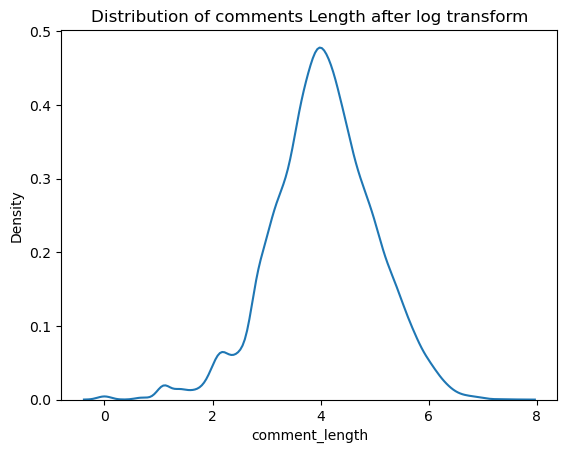

In [19]:
## Distribution of the log tranformed of Length comments
sns.kdeplot(data = np.log(df["comment_length"]))
plt.title ("Distribution of comments Length after log transform")
plt.show()

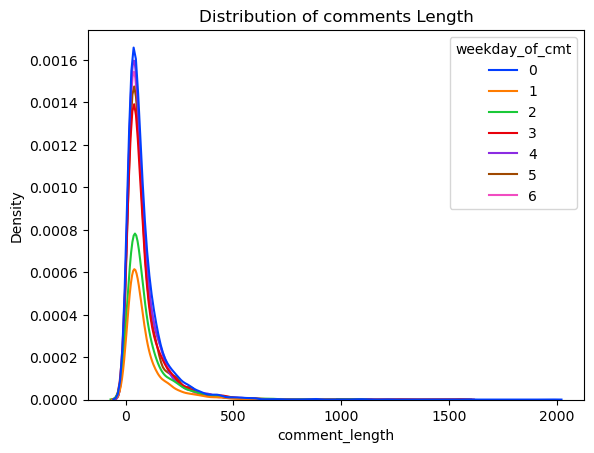

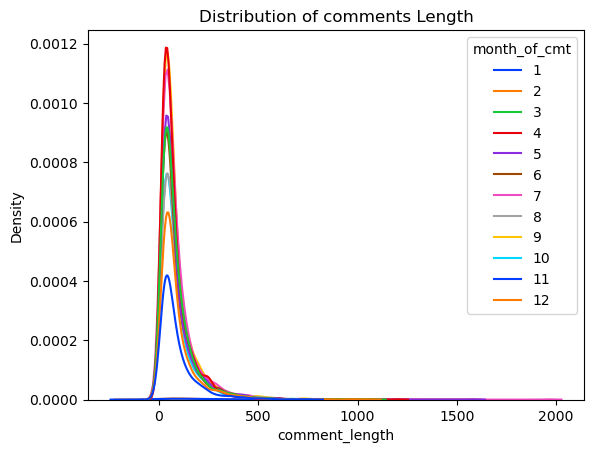

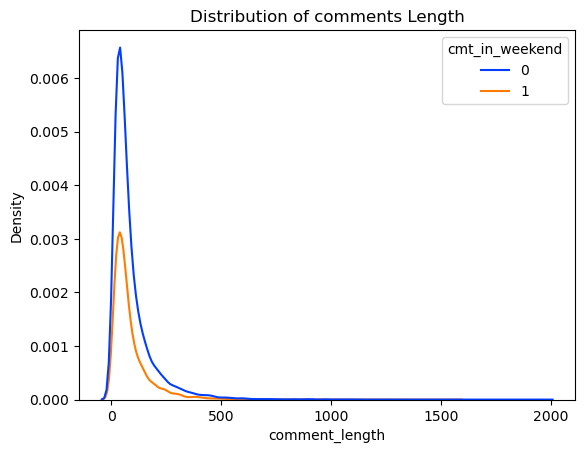

In [20]:
# Length of comment versus element of date / time of comment
sns.kdeplot(data = df, x = "comment_length", hue = "weekday_of_cmt", palette = "bright")
plt.title ("Distribution of comments Length")
plt.show()

sns.kdeplot(data = df, x = "comment_length", hue = "month_of_cmt", palette = "bright")
plt.title ("Distribution of comments Length")
plt.show()

sns.kdeplot(data = df, x = "comment_length", hue = "cmt_in_weekend", palette = "bright")
plt.title ("Distribution of comments Length")
plt.show()



Same positively skewed distribution whichever the month, the weekdey/weekend

### Average comment's Length par rating class

,comment_length
rating,
1,191.348505
2,198.260083
3,179.239643
4,101.514392
5,68.750439


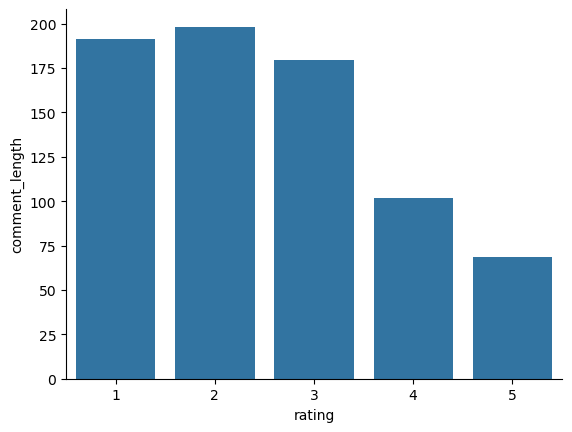

In [21]:
avg_cmt_length = df[["comment_length", "rating"]].groupby("rating").mean()
display(avg_cmt_length)
sns.barplot(data = avg_cmt_length, x = avg_cmt_length.index, y = "comment_length")
sns.despine()
plt.show()

#### Remark
On average, reviews with rating equal or less than 3 tend to have lengthier comments on average.
The average length of comment decrease when the rating increase.

### Box plot of comment's Length versus rating

/Users/dkcentral/anaconda3/envs/dst_pjt/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


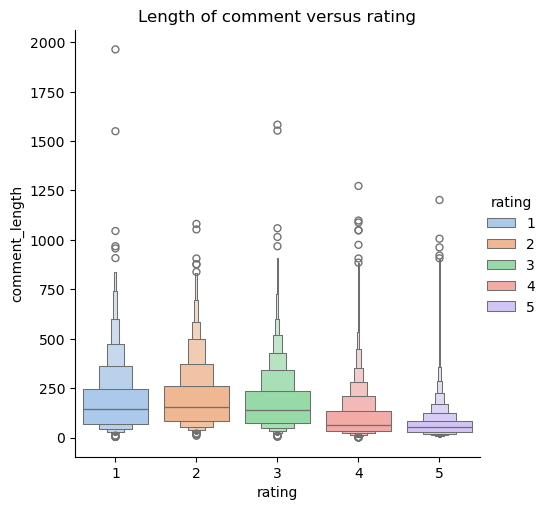

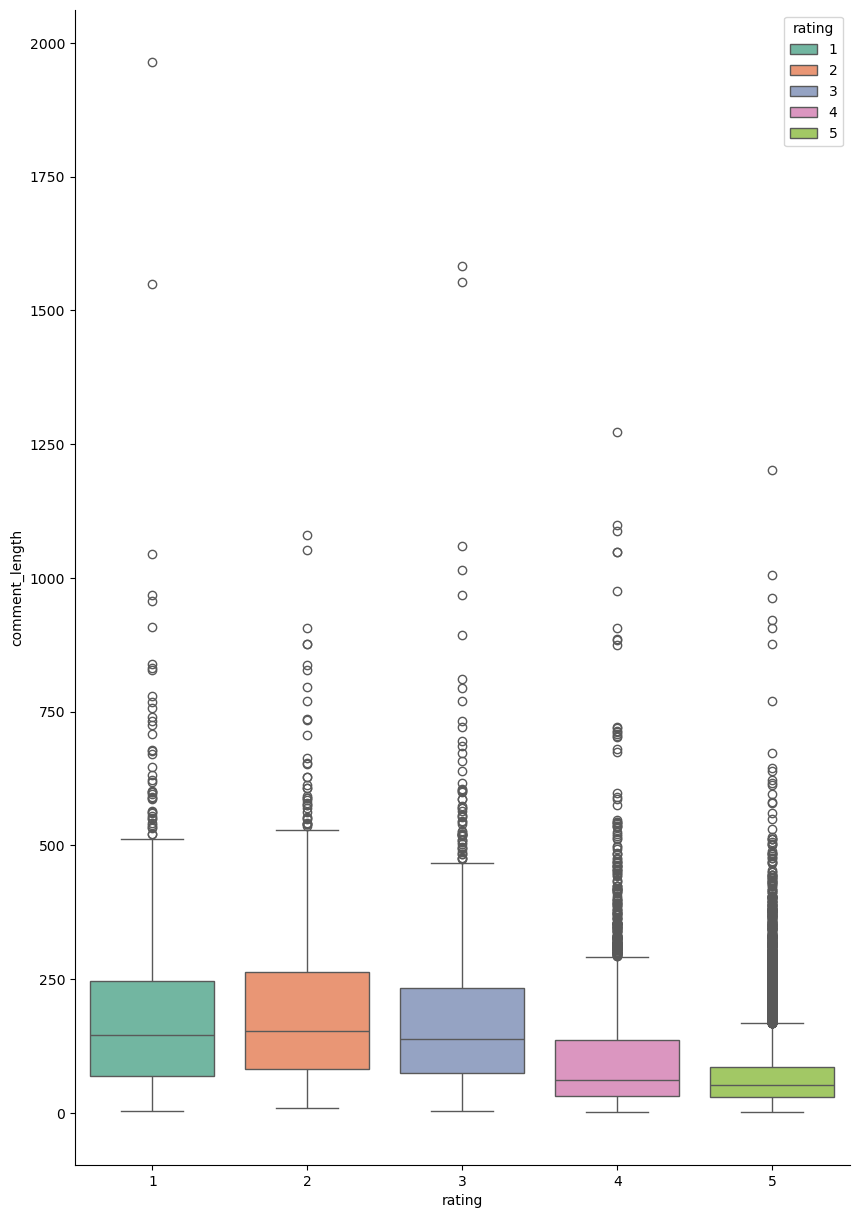

In [22]:
sns.catplot(data=df, x="rating", y="comment_length", hue = "rating", kind = "boxen", palette = "pastel")
plt.title("Length of comment versus rating")
sns.despine()
plt.show()

plt.figure(figsize=(10,15))
sns.boxplot(data=df, x = "rating", y="comment_length", hue="rating", palette = "Set2")
sns.despine()
plt.show()

### Boxplot of rating versus comment_length after log transformation

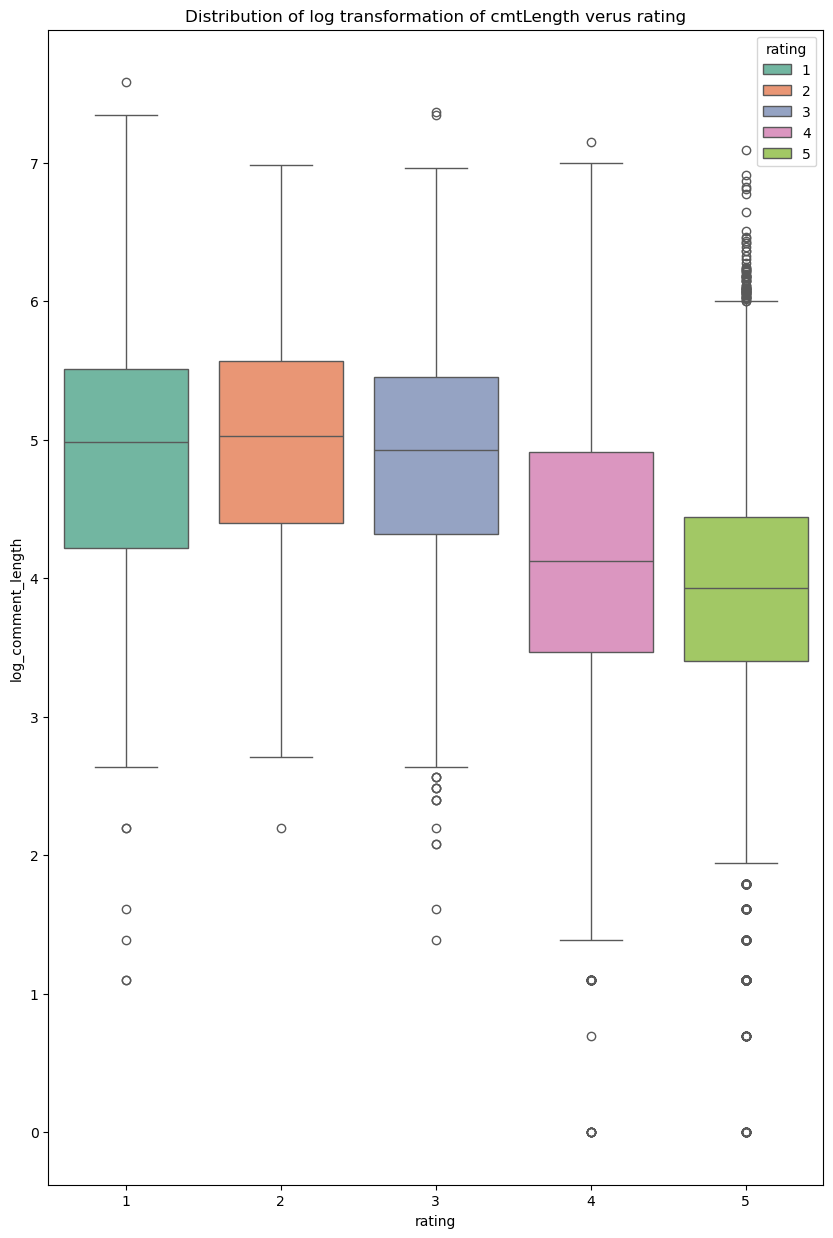

In [23]:
df["log_comment_length"] = np.log(df["comment_length"])
plt.figure(figsize=(10,15))
plt.title("Distribution of log transformation of cmtLength verus rating")
sns.boxplot(data=df, x = "rating", y="log_comment_length", hue="rating", palette = "Set2")
plt.show()

#### Box plot of comment's length versus ratings
From the Box plot we observe :
> - Positive skewness
> 
> - A lot of outliers
> 
> - A separation between ratings <=3 and ratings >=4

## Rating versus Title's length

In [24]:
df["title_length"] = df["title"].apply(lambda x: len(x))

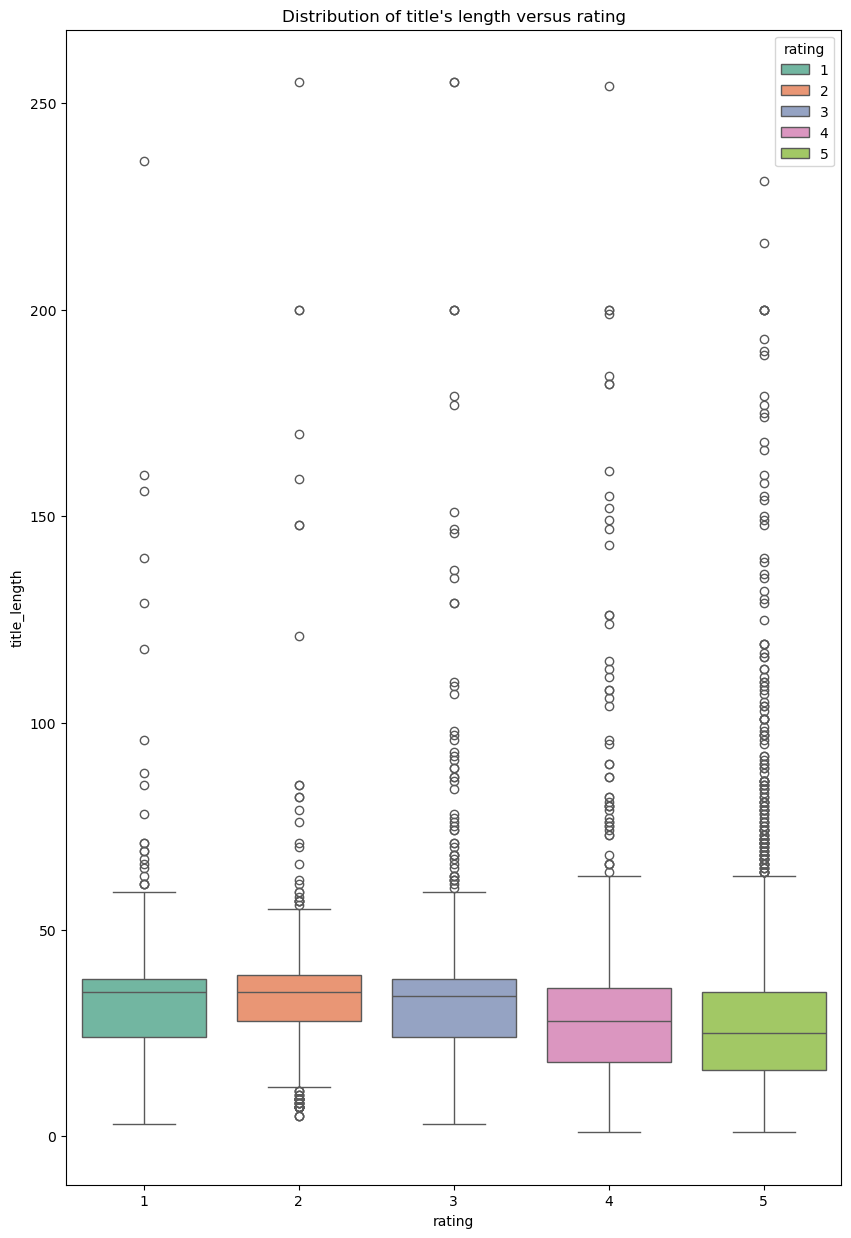

In [25]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df, x = "rating", y="title_length", hue="rating", palette = "Set2")
plt.title("Distribution of title's length versus rating")
plt.show()

### Remarks
Same trend as with the length of comment. The distribution shows: 
> 1) two groups : rating <= 3 and rating > 3
> 
> 2) Positive skeweness and a lot of outliers


## Supplier Reply and Rating

### Rating versus number of days between transaction date and review date

In [26]:
df["nb_days_before_review"] = (df["date_of_cmt"] - df["transaction_date"])/ pd.Timedelta(1, unit='d')
df["nb_days_before_review"].describe()

count    23545.000000
mean         9.088469
std          7.391044
min        -12.000000
25%          5.000000
50%          6.000000
75%         10.000000
max        157.000000
Name: nb_days_before_review, dtype: float64

### Zoom on lines with review date happening before the transactions date

In [27]:
V = df["nb_days_before_review"]
df[V < 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, rev-b7ecd9fc-5708-4b2f-ba0e-2a437f1cf5a1 to rev-02b10cf8-6a8b-4aaf-9b41-26b660e6b297
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   rating                  76 non-null     int64         
 1   title                   76 non-null     object        
 2   comment                 76 non-null     object        
 3   createdAt               76 non-null     datetime64[ns]
 4   transaction             76 non-null     datetime64[ns]
 5   SupplierReply           20 non-null     object        
 6   SupplierReplyDate       20 non-null     object        
 7   date_of_cmt             76 non-null     object        
 8   year_of_cmt             76 non-null     int32         
 9   month_of_cmt            76 non-null     int32         
 10  day_of_cmt              76 non-null     int32         
 11  weekday_of_cmt          76 non-null     

### We remove those lines review date happening before the transactions date

In [28]:
df = df[V >= 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23469 entries, rev-cc907a30-4fb0-4e55-a4a1-307b89eb0d99 to rev-8e0a67aa-a803-4fb9-8859-d29d9aa58226
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   rating                  23469 non-null  int64         
 1   title                   23469 non-null  object        
 2   comment                 23469 non-null  object        
 3   createdAt               23469 non-null  datetime64[ns]
 4   transaction             23469 non-null  datetime64[ns]
 5   SupplierReply           4841 non-null   object        
 6   SupplierReplyDate       4841 non-null   object        
 7   date_of_cmt             23469 non-null  object        
 8   year_of_cmt             23469 non-null  int32         
 9   month_of_cmt            23469 non-null  int32         
 10  day_of_cmt              23469 non-null  int32         
 11  weekday_of_cmt          23469 non-nul

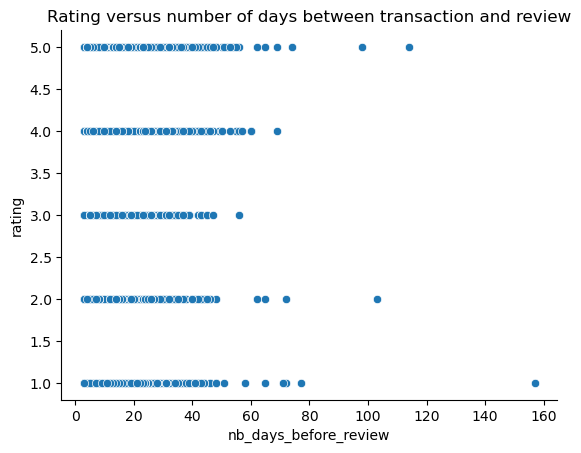

In [29]:
sns.scatterplot(data = df, x = "nb_days_before_review", y = "rating")
plt.title("Rating versus number of days between transaction and review")
sns.despine()
plt.show()

### Average number of days before review, per rating class

,nb_days_before_review
rating,
1,14.317105
2,12.389045
3,11.512215
4,9.737911
5,8.447433


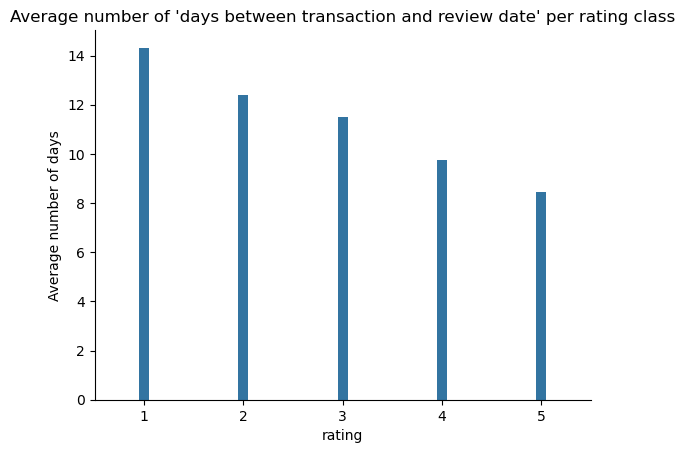

In [30]:
avg_nb_days = df[["nb_days_before_review", "rating"]].groupby("rating").mean()
display(avg_nb_days)
sns.barplot(data = avg_nb_days, x = avg_nb_days.index, y = "nb_days_before_review", width = 0.1)
plt.title("Average number of 'days between transaction and review date' per rating class")
plt.ylabel("Average number of days")
sns.despine()
plt.show()

#### Remarks
In average, it seams that the longer it takes to post the review, the worst the rating is.

### Boxplot of rating  versus number of day it takes to review

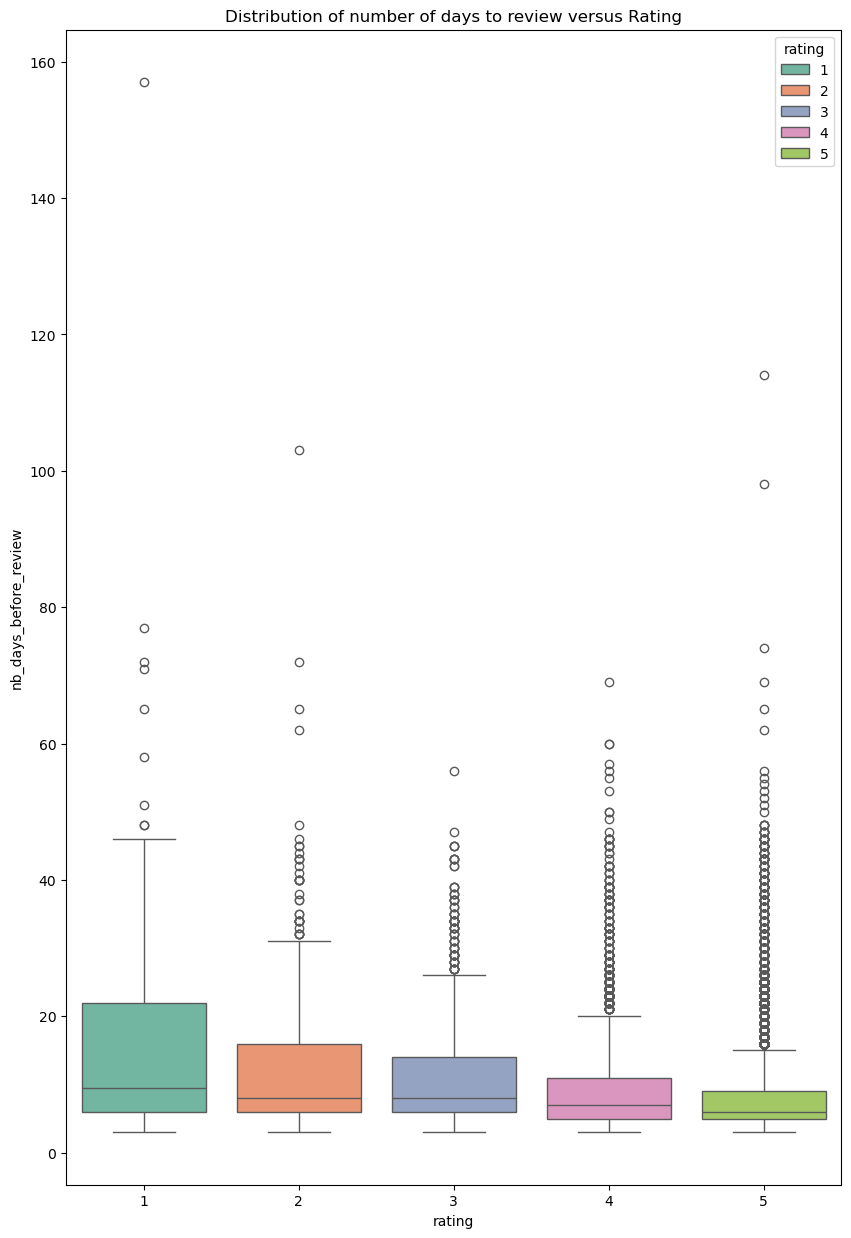

In [31]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df, x = "rating", y="nb_days_before_review", hue="rating", palette = "Set2")
plt.title("Distribution of number of days to review versus Rating")
plt.show()

## Correlation Analysis

In [32]:
cols = ['rating', 'comment_length', 'title_length', 'nb_days_before_review', 'month_of_cmt', 'day_of_cmt', 'weekday_of_cmt', 'cmt_in_weekend', 'hour_of_cmt']
df[cols].head()

,rating,comment_length,title_length,nb_days_before_review,month_of_cmt,day_of_cmt,weekday_of_cmt,cmt_in_weekend,hour_of_cmt
id,,,,,,,,,
rev-cc907a30-4fb0-4e55-a4a1-307b89eb0d99,4,1049,7,12.0,10,5,3,0,14
rev-b54467c4-4769-42e3-a74a-c72c000059f9,4,885,39,21.0,10,2,0,0,13
rev-b480f537-524e-491e-9f85-74405332c047,4,713,40,12.0,9,18,0,0,16
rev-f04626f5-846d-41ca-9866-46573746f75b,4,712,66,11.0,10,13,4,0,8
rev-d3bb4eb5-ea0f-45db-afb5-313eaeaed6cb,5,639,200,6.0,9,21,3,0,11


## Heatmap 

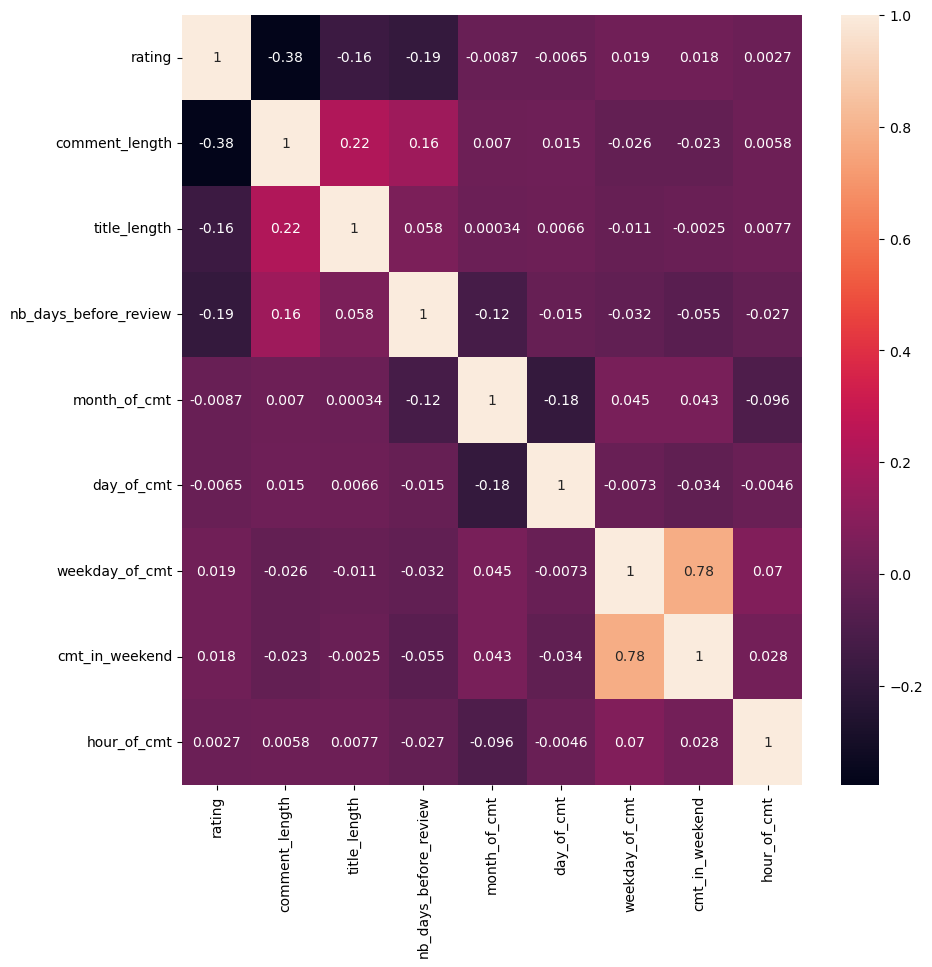

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df[cols].corr(), annot = True)
plt.show()

#### Remarks on the heatmap
> 1) The heatmap shows that there is a week negative correlation between the rating and comment_length, title_length, nb_days_before_reviews
> 2) Comment_length has the highest correlation at - 0.38 followed by nb_days_before_review at - 0.19 and title_length at - 0.16
> 3) There is almost zero correlation bettween title_length and nb_days_before_review
> 4) comment_lenght and title_lenght have a positive weak correlation of 0.22
> 5) nb_days_before_review and comment_lenghth have a week positive correlation of 0.16


### Scatterplot of comment_length versus title_length

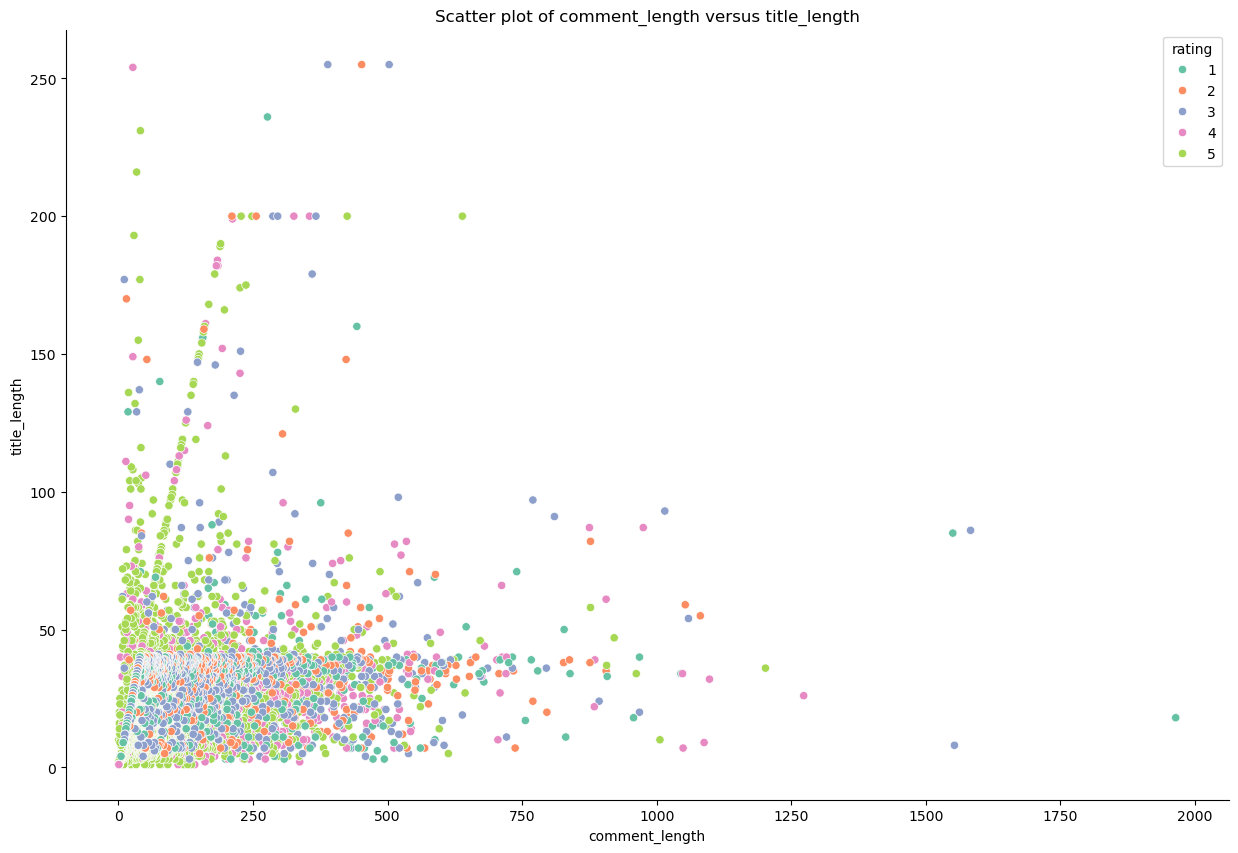

/Users/dkcentral/anaconda3/envs/dst_pjt/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

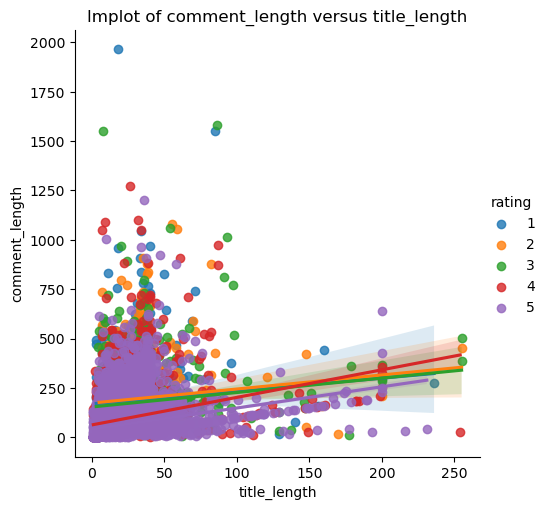

In [34]:
# scatter plot of lenght of comment versus length of title
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x ="comment_length", y="title_length", hue = "rating", palette = "Set2")
plt.title("Scatter plot of comment_length versus title_length")
sns.despine()
plt.show()

plt.figure(figsize=(15, 10))
sns.lmplot(data=df, y ="comment_length", x="title_length", hue = "rating")
plt.title("lmplot of comment_length versus title_length")
sns.despine()
plt.show()

### Scatter plot of comment_length versus nb_days_before_review  

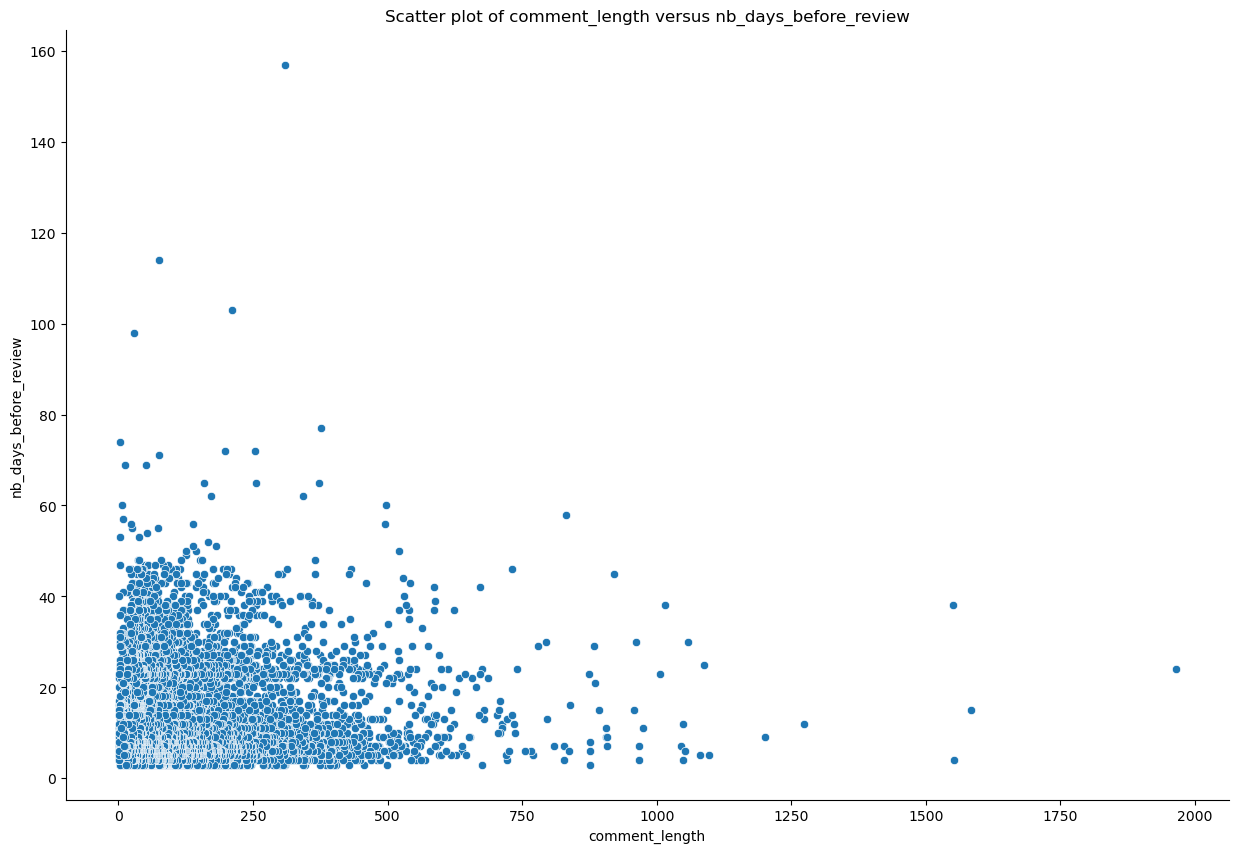

/Users/dkcentral/anaconda3/envs/dst_pjt/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

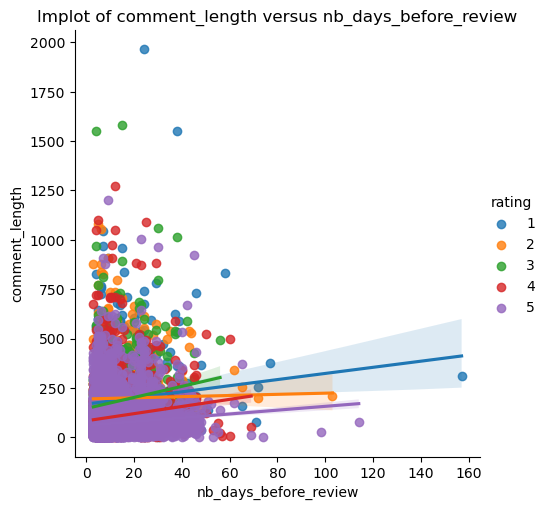

In [87]:
# scatter plot of lenght of comment versus nb_days_before_review
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x ="comment_length", y="nb_days_before_review")
plt.title("Scatter plot of comment_length versus nb_days_before_review")
sns.despine()
plt.show()

plt.figure(figsize=(15, 10))
sns.lmplot(data=df, y ="comment_length", x="nb_days_before_review", hue = "rating")
plt.title("lmplot of comment_length versus nb_days_before_review")
sns.despine()
plt.show()

In [ ]:
# Stripplot of lenght of comment versus nb_days_before_review

plt.figure(figsize=(17, 10))
sns.stripplot(data=df, y ="comment_length", x="nb_days_before_review")
plt.title("Scatter plot of comment_length versus nb_days_before_review")
plt.xticks(rotation = 45)
sns.despine()
plt.show()

plt.figure(figsize=(17, 10))
sns.stripplot(data=df, y ="comment_length", x="nb_days_before_review", hue="rating", palette = "Set2")
plt.title("Scatter plot of comment_length versus nb_days_before_review")
plt.xticks(rotation = 45)
sns.despine()
plt.show()


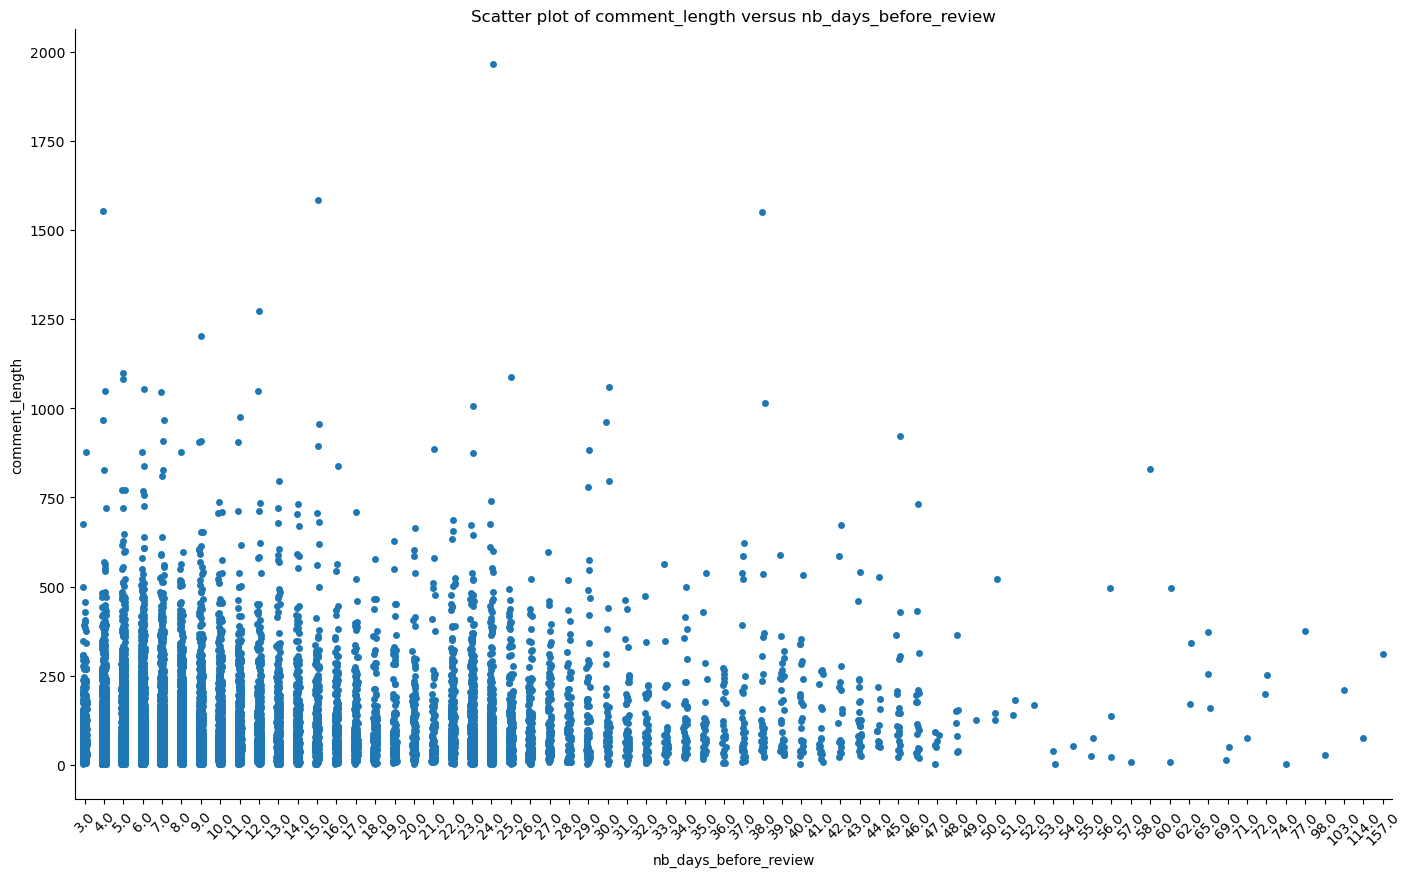

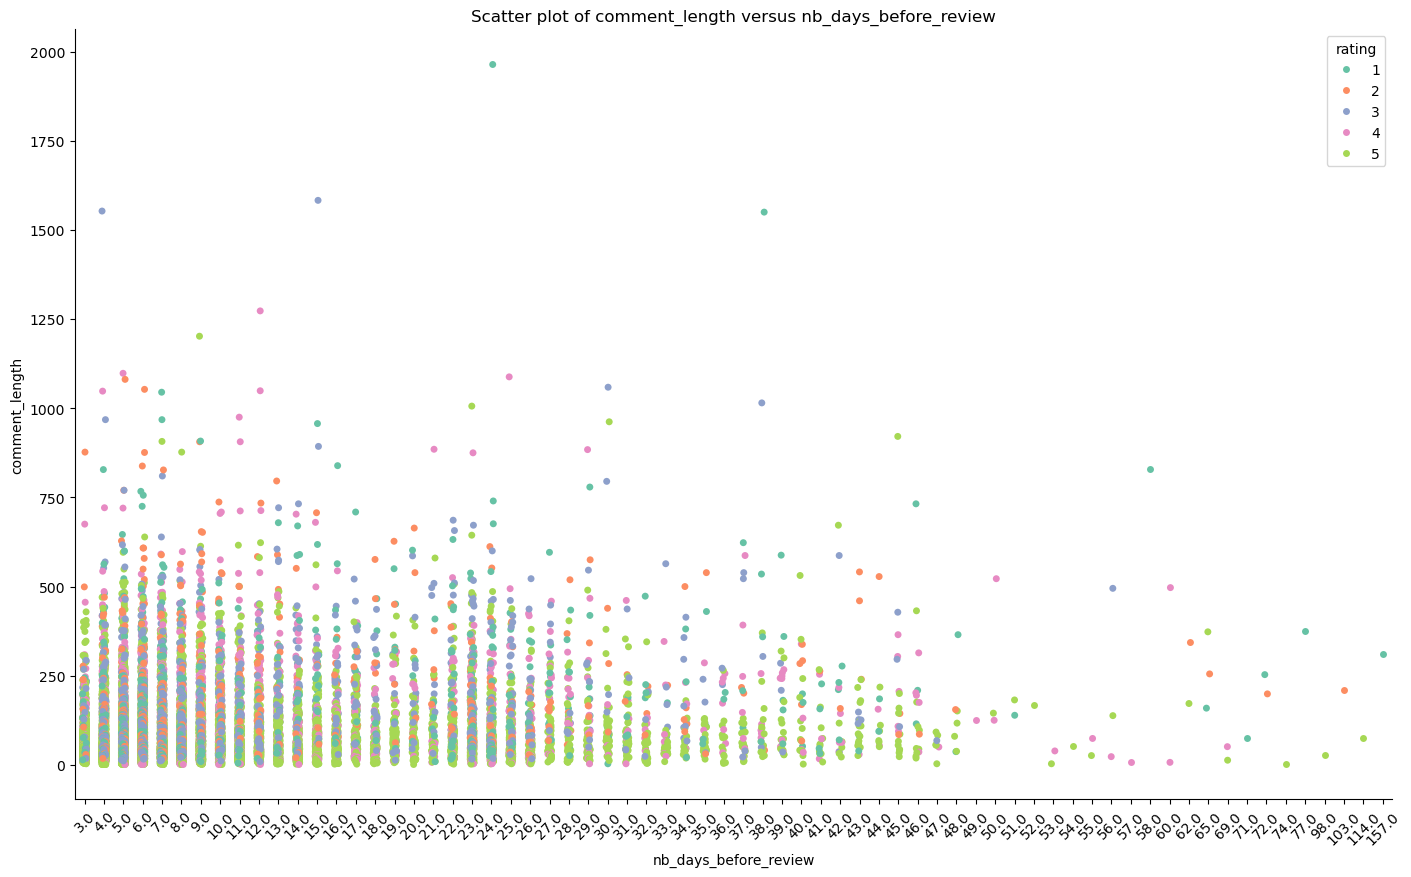

In [85]:
# Stripplot of lenght of comment versus nb_days_before_review

plt.figure(figsize=(17, 10))
sns.stripplot(data=df, y ="comment_length", x="nb_days_before_review")
plt.title("Scatter plot of comment_length versus nb_days_before_review")
plt.xticks(rotation = 45)
sns.despine()
plt.show()

plt.figure(figsize=(17, 10))
sns.stripplot(data=df, y ="comment_length", x="nb_days_before_review", hue="rating", palette = "Set2")
plt.title("Scatter plot of comment_length versus nb_days_before_review")
plt.xticks(rotation = 45)
sns.despine()
plt.show()




> #### Figure comment : It seems that, in average, when the number of days before review increases the comment's length decreases.

### Scatter plot of title_length versus nb_days_before_review

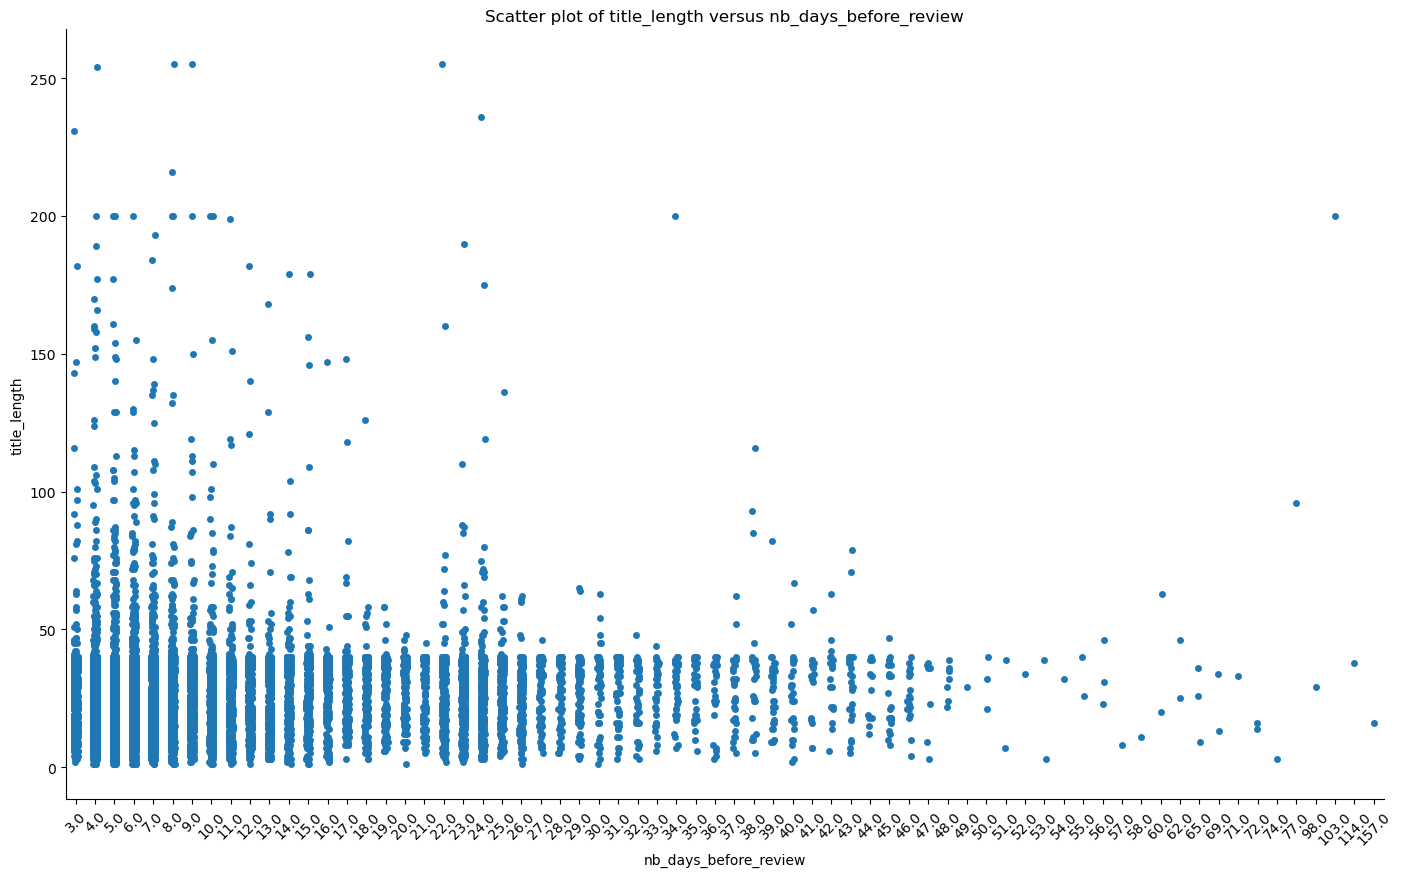

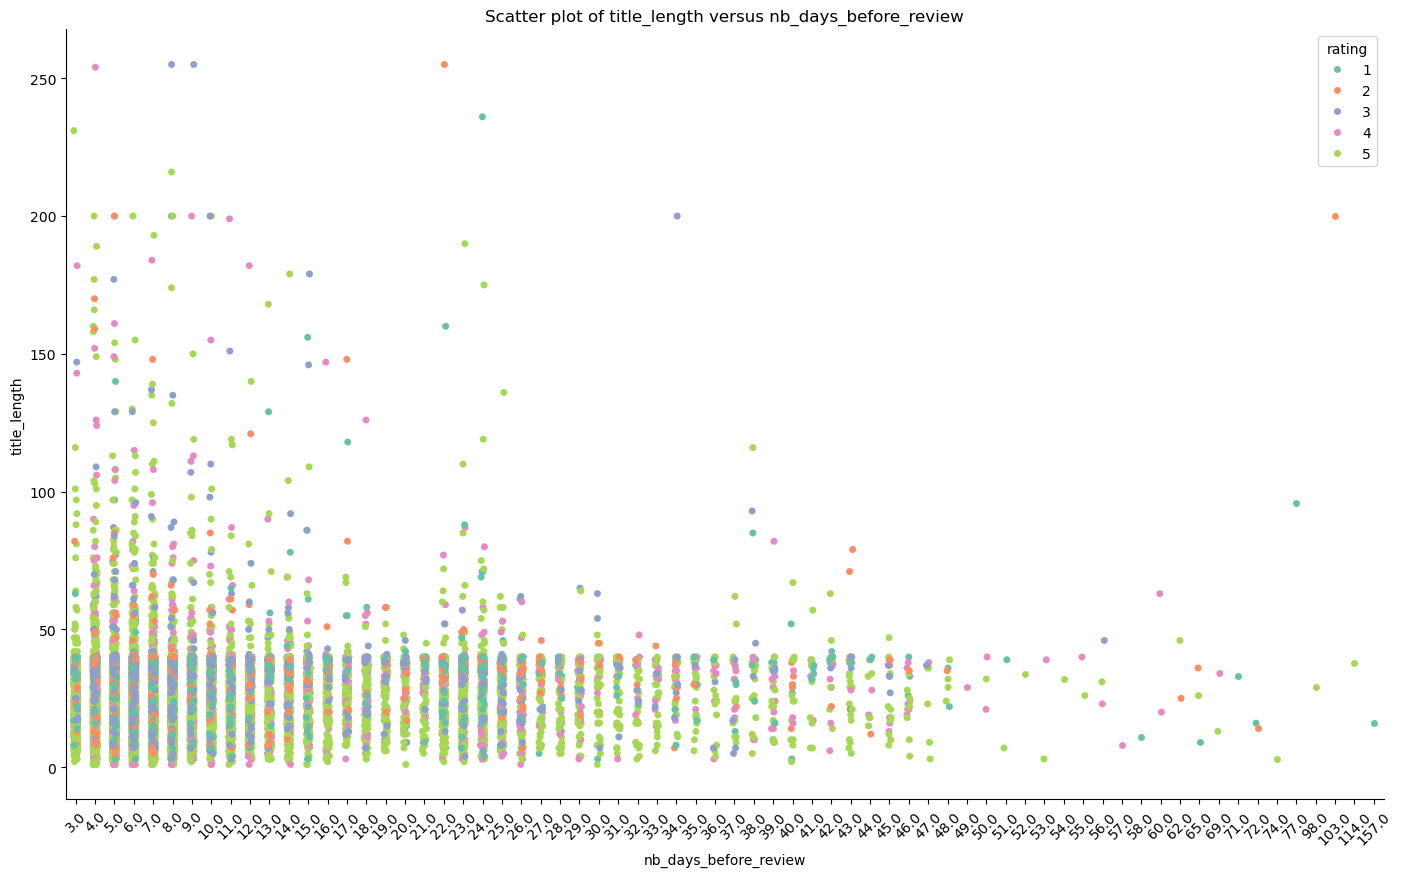

In [86]:
# scatter plot of title_lenght versus nb_days_before_review

plt.figure(figsize=(17, 10))
sns.stripplot(data=df, y ="title_length", x="nb_days_before_review")
plt.title("Scatter plot of title_length versus nb_days_before_review")
plt.xticks(rotation = 45)
sns.despine()
plt.show()

plt.figure(figsize=(17, 10))
sns.stripplot(data=df, y ="title_length", x="nb_days_before_review", hue="rating", palette = "Set2")
plt.title("Scatter plot of title_length versus nb_days_before_review")
plt.xticks(rotation = 45)
sns.despine()
plt.show()


> #### Figure comment : There seems to be a cap at 45 for the length's comment. No visible trends to infer on the relation between title_length and nb_days_before_review

## The next step is to check if the correlations pinpointed previously are statistically significant

## Anova test : Dependance of Rating and comment_lenght?
Tests between a categorical variable and a numeric variable ==> ANOVA TEST :
> - H0: rating doesn't have a significative impact on the comment's length
> - H1: rating has a significant impact on the comment's length

But Anova requires comment_length to follow a normal distribution
We've seen in previous visual analysis that de the distribution of "comment_length", "title_length", "nb_days_before_review" were very positively skewed thus non normal.

How ever let us confirm with a QQ PLOT and check also wether their logrithmic transformation follow a normal distribution

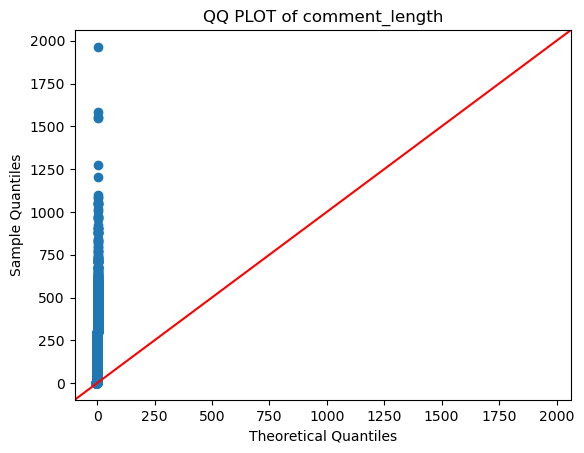

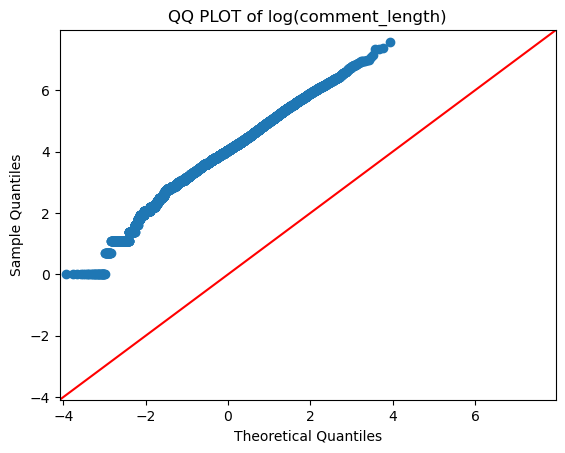

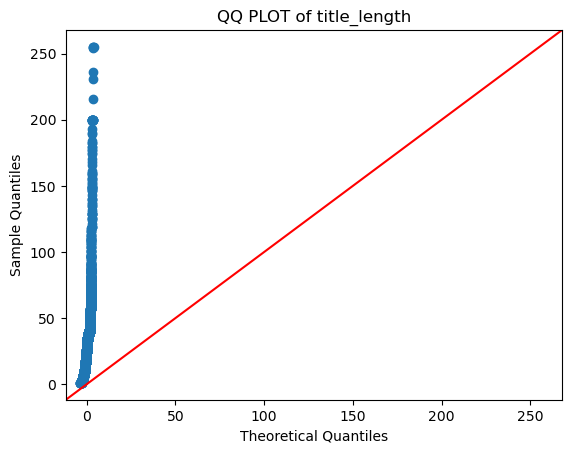

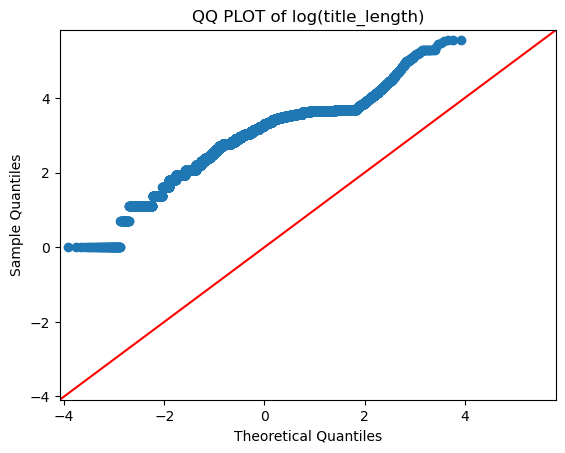

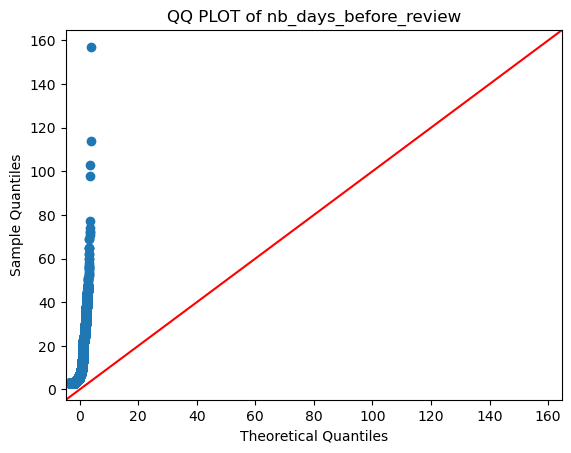

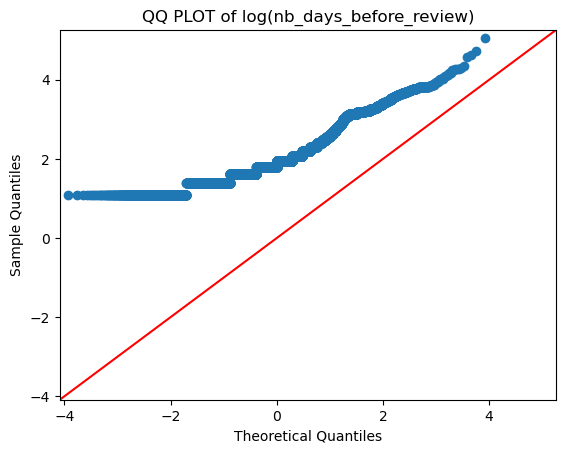

In [35]:
# Check the normalty of of "
feat_to_test = ["comment_length", "title_length", "nb_days_before_review"]

for col in feat_to_test:
    sm.qqplot(df[col], line='45')
    plt.title("QQ PLOT of {}".format(col))
    plt.show()
    
    sm.qqplot(np.log(df[col]), line='45')
    plt.title("QQ PLOT of log({})".format(col))
    plt.show()


### Comment of QQ-Plot figures
> Unsurprisingly, the 3 variables do not follow a normal distrubtion nor the log transformation of title_length, nb_days_before_review.
> However the log transformation of comment_length have normal distribution like. 
>Thus we can performe an anova test of the effect of rating on the log_comment_length.

In [90]:
# test anova on rating versu log_comment_length
result = statsmodels.formula.api.ols('log_comment_length ~ rating', df[["log_comment_length", "rating"]]).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
rating,1.0,2146.805056,2146.805056,2673.861857,0.0
Residual,23467.0,18841.315276,0.802886,NaN,NaN


#### Anova test result: rating versus log_comment_length
> p-value is 0.0 thus we reject the H0 hypothesis.
> 
> We can conclude that "rating" has a significant effect on log_comment_length.

## Kruska Wallis test
Since the distribution of comment_length and title_length are skewed, we cannot perform the anova test.
Instead, we'll perfom a Kruska Wallis test, a non parametric test that doesn't require the samples to have normal distribution.
> - H0: The population median of all of the groups (rating class)  are equal
> - H1 : At least one population median of one group is different from the population median of at least one other group

In [37]:
#import scipy
# Kruskal-Wallis test of rating versus "comment_length", "title_length", "nb_days_before_review"
feat_to_test = ["comment_length", "title_length", "nb_days_before_review"]

print("Kruskal-Wallis p-values:")
for feat in feat_to_test :
    kstat, pval = scipy.stats.kruskal(*[group[feat].values for name, group in df[["rating", feat]].groupby("rating")]) 
#the p-value
    print("Rating vs {} p-value:".format(feat), pval)

Kruskal-Wallis p-values:
Rating vs comment_length p-value: 0.0
Rating vs title_length p-value: 1.3410648040923537e-175
Rating vs nb_days_before_review p-value: 1.2629329570212838e-163


### Conclusion of Kruska Wallis test
> The 3 p-values are infinitesimal, so we reject H0 hypothesis
> and conclude that the rating leads to statistically significant difference in "comment_length", "title_length" and "nb_days_before_review"

## Spearman correlation test between comment_length and title_length, nb_days_before_review,rating
Since the two variables do not follow a normal distribution

In [38]:
from scipy.stats import spearmanr
#calculate Spearman Rank correlation and corresponding p-value
print("Spearman correlation test")
rho, p = spearmanr(df['comment_length'], df['title_length'])
print("comment_lenght vs title_lenght: p-value=", p, "** rho=", rho)
rho, p = spearmanr(df['comment_length'], df['nb_days_before_review'])
print("comment_lenght vs nb_days_before_review: p-value=", p, "** rho=", rho)
print("\n")
rho, p = spearmanr(df['comment_length'], df['rating'])
print("comment_lenght vs rating: p-value=", p, "** rho=", rho)


Spearman correlation test
comment_lenght vs title_lenght: p-value= 0.0 ** rho= 0.358636111558593
comment_lenght vs nb_days_before_review: p-value= 6.544497976680112e-98 ** rho= 0.13644575065964792


comment_lenght vs rating: p-value= 0.0 ** rho= -0.28666149706034383


### Conclusion of Spearman correlation test
> 1) The p-value for both tests are zero or infinitesimal, thus the correlation between comment_length and
the two variables title_lenght, nb_days_before_review is statistically significant
> 2) p-value for spearman correlation between comment_length and rating is zero, thus the correlation between comment_length and rating si statistically significant.

## Multicollinearity analysis between the explanatory variables : comment_length, title_lenght and nb_days_before_reviews
We calculate Variance Inflation Factor (VIF) to detect the collinearity and it's strength between comment_length, title_length and nb_days_before_review.
> - The variance inflation factor (VIF) measures the amount of collinearity among predictor variables in a multiple regression model. And it is calculated as the ratio of the given predictor variable’s variance to the residuals’ variance.
> - A variance inflation factor of 1 indicates no collinearity. In contrast, a VIF more significant than 1 suggests that collinearity is present. The VIF can be used to assess whether the inclusion of a given predictor variable in a multiple regression model is warranted.
> - If the VIF for a given predictor is high, it may indicate that the predictor is redundant with other predictors in the model. We can also remove it without affecting the model fit.

### Steps for Implementing VIF
> - Run a multiple regression.
> - Calculate the VIF factors.
> - Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.


In [95]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('comment_length ~ title_length+nb_days_before_review', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
display(vif)

y, X = dmatrices('title_length ~ comment_length+nb_days_before_review', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
display(vif)

,VIF,variable
0,5.464626,Intercept
1,1.003351,title_length
2,1.003351,nb_days_before_review


,VIF,variable
0,3.031557,Intercept
1,1.027085,comment_length
2,1.027085,nb_days_before_review


### VIF is almost equal to 1 for the three variables. We can conclude that there is no collinearity between comment_length, title_length and nb_days_before_review.

## 1st Conclusions of EDA anlysis
> 1) Following the previous analysis, we retain the comment's length as our first feature for the prediction of rating.
> 2) So far it is not much information to allow us to predict accordingly the rating. We'll have to proceed with further analysis of the comment's content to find more insights

## Data of suppliers replies

In [39]:
dfr = df[~df["SupplierReply"].isna()]

In [40]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4841 entries, rev-0134d691-cf06-4caa-8d42-528cea655fa2 to rev-8e0a67aa-a803-4fb9-8859-d29d9aa58226
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   rating                  4841 non-null   int64         
 1   title                   4841 non-null   object        
 2   comment                 4841 non-null   object        
 3   createdAt               4841 non-null   datetime64[ns]
 4   transaction             4841 non-null   datetime64[ns]
 5   SupplierReply           4841 non-null   object        
 6   SupplierReplyDate       4841 non-null   object        
 7   date_of_cmt             4841 non-null   object        
 8   year_of_cmt             4841 non-null   int32         
 9   month_of_cmt            4841 non-null   int32         
 10  day_of_cmt              4841 non-null   int32         
 11  weekday_of_cmt          4841 non-null 

In [41]:
dfr["reply_date"] = pd.to_datetime(dfr["SupplierReplyDate"], errors="coerce", format='ISO8601') #coerce pour passer les NaN
dfr["reply_year"] = dfr["reply_date"].dt.year
dfr["reply_month"] = dfr["reply_date"].dt.month
dfr["reply_day"] = dfr["reply_date"].dt.day
dfr["reply_weekday"] = dfr["reply_date"].dt.weekday
dfr["reply_in_weekend"] = dfr["reply_date"].dt.weekday.isin([5,6]).astype(int)

/var/folders/ry/gnpg53353x10by902xfbt9vw0000gn/T/ipykernel_11111/3267967533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr["reply_date"] = pd.to_datetime(dfr["SupplierReplyDate"], errors="coerce", format='ISO8601') #coerce pour passer les NaN
/var/folders/ry/gnpg53353x10by902xfbt9vw0000gn/T/ipykernel_11111/3267967533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr["reply_year"] = dfr["reply_date"].dt.year
/var/folders/ry/gnpg53353x10by902xfbt9vw0000gn/T/ipykernel_11111/3267967533.py:3: Sett

### Proportion of supplier replies per rating

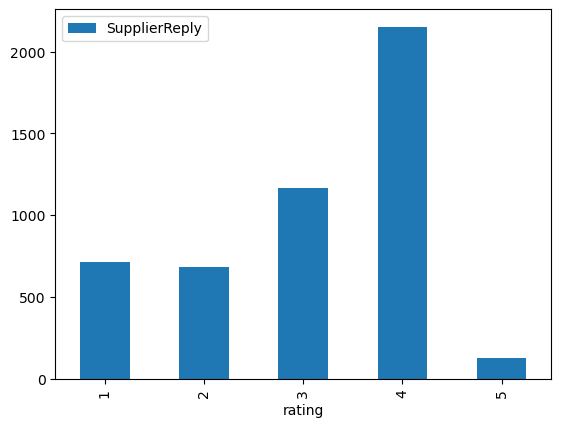

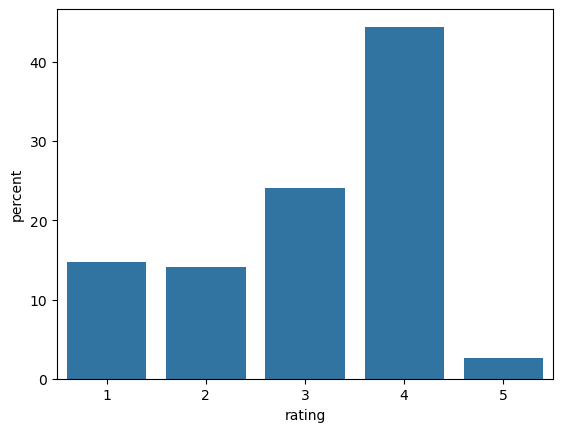

In [42]:
# Proportion of supplier replies per rating
dfr[["SupplierReply", "rating"]].groupby("rating").count().plot(kind = "bar")
plt.show()

# En pourcentages
sns.countplot(data=dfr, x = "rating", stat = "percent")
plt.show()

#### Remarks
1) Replies are mostly for ratings under or equal to 4
2) Most of the replies are for reviews with rating 4 followed by reviews with rating 3 .
   
Replies mostly for rating 1 (around 17% of replies) ,2(around 16% of replies), 3(around 26% of replies) and 4 (around 38% of Replies). 
Review with rating 5 have around 2.5% of replies

In [43]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4841 entries, rev-0134d691-cf06-4caa-8d42-528cea655fa2 to rev-8e0a67aa-a803-4fb9-8859-d29d9aa58226
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   rating                  4841 non-null   int64         
 1   title                   4841 non-null   object        
 2   comment                 4841 non-null   object        
 3   createdAt               4841 non-null   datetime64[ns]
 4   transaction             4841 non-null   datetime64[ns]
 5   SupplierReply           4841 non-null   object        
 6   SupplierReplyDate       4841 non-null   object        
 7   date_of_cmt             4841 non-null   object        
 8   year_of_cmt             4841 non-null   int32         
 9   month_of_cmt            4841 non-null   int32         
 10  day_of_cmt              4841 non-null   int32         
 11  weekday_of_cmt          4841 non-null 

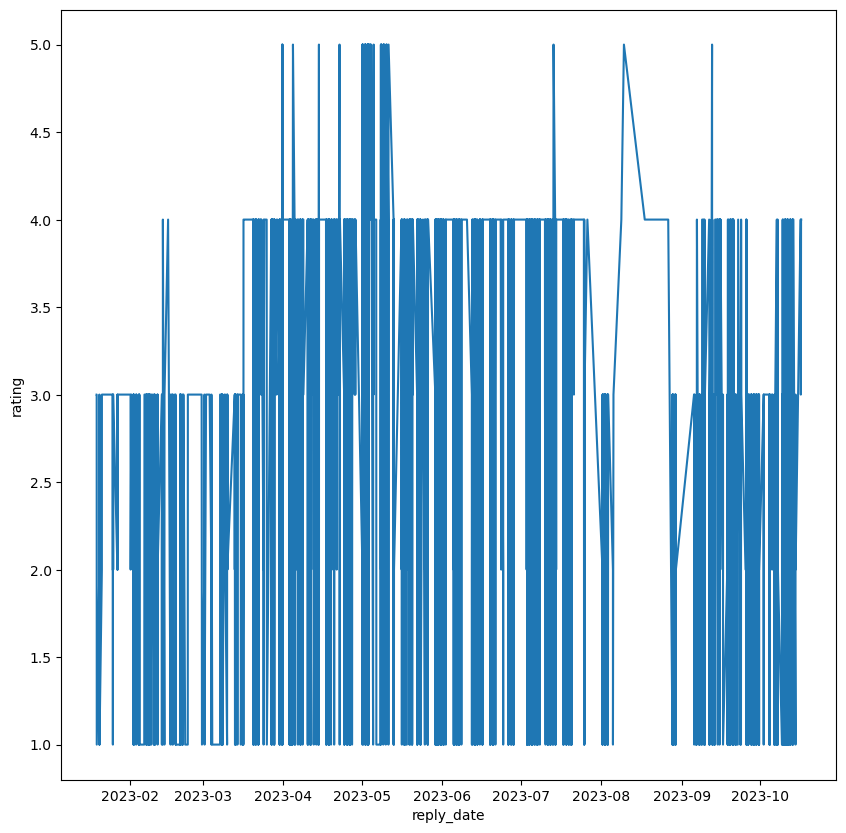

In [44]:
# lineplot of replies
plt.figure(figsize=(10,10))
sns.lineplot(data = dfr, x = "reply_date", y = "rating")
plt.show()

## TBD :  Further analysis of Supplier Reply data

In [45]:
# Save the data into "redoute_v3.csv for further analysis in another Notebook
#df.to_csv("redoute_v3.csv")
#dfr.to_csv("redoute_reply.csv")